In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import bq_helper
import seaborn as sns
from bq_helper import BigQueryHelper

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
chicago_crime = bq_helper.BigQueryHelper(active_project="bigquery-public-data", dataset_name="chicago_crime")
bq_assistant = BigQueryHelper("bigquery-public-data", "chicago_crime")

Using Kaggle's public dataset BigQuery integration.
Using Kaggle's public dataset BigQuery integration.


**Run a query to get data to put into a dataframe**

In [53]:
select_query = """SELECT date,district,primary_type,location_description,ward,arrest,domestic,community_area,year,latitude,longitude,location
            FROM `bigquery-public-data.chicago_crime.crime`
            LIMIT 300000"""
crime_data = chicago_crime.query_to_pandas_safe(select_query)


**Data exploration**
**Look at first five crime data rows** 

In [54]:
print(crime_data.head())

                       date  district                primary_type  \
0 2016-03-13 12:00:00+00:00      31.0  OFFENSE INVOLVING CHILDREN   
1 2008-05-13 20:35:00+00:00      31.0                   NARCOTICS   
2 2019-12-08 10:30:00+00:00      31.0          DECEPTIVE PRACTICE   
3 2008-10-24 19:55:00+00:00      31.0                   NARCOTICS   
4 2018-08-01 00:01:00+00:00      31.0  OFFENSE INVOLVING CHILDREN   

  location_description  ward  arrest  domestic  community_area  year  \
0            RESIDENCE  10.0   False      True            52.0  2016   
1                OTHER  41.0    True     False            10.0  2008   
2            RESIDENCE  41.0   False     False             9.0  2019   
3            RESIDENCE  41.0    True     False             9.0  2008   
4            RESIDENCE  12.0   False      True            59.0  2018   

    latitude  longitude                       location  
0  41.968013 -87.818796  (41.968013038, -87.818796103)  
1  41.975874 -87.807053  (41.975874105

**Look at the last 5 rows**

In [55]:
crime_data.tail()

,date,district,primary_type,location_description,ward,arrest,domestic,community_area,year,latitude,longitude,location
299995,2002-03-20 00:30:00+00:00,25.0,OTHER OFFENSE,STREET,NaN,False,False,NaN,2002,41.929491,-87.802771,"(41.929490827, -87.802770717)"
299996,2002-01-08 15:36:10+00:00,25.0,OTHER OFFENSE,STREET,NaN,True,False,NaN,2002,41.918712,-87.765511,"(41.918711651, -87.76551063)"
299997,2001-03-24 06:31:50+00:00,25.0,OTHER OFFENSE,STREET,NaN,True,False,NaN,2001,41.918608,-87.765578,"(41.918607701, -87.765577689)"
299998,2001-09-08 17:15:00+00:00,25.0,OTHER OFFENSE,STREET,NaN,True,False,NaN,2001,41.902396,-87.746128,"(41.902395732, -87.746127553)"
299999,2001-10-24 21:50:00+00:00,25.0,OTHER OFFENSE,STREET,NaN,True,False,NaN,2001,41.906076,-87.746186,"(41.906076053, -87.746185669)"


**Get sample of random values, I'm most curious about the crime type so I'll explore that below.**

In [56]:
crime_data.sample(10)

,date,district,primary_type,location_description,ward,arrest,domestic,community_area,year,latitude,longitude,location
107500,2013-08-04 14:00:00+00:00,8.0,SEX OFFENSE,STREET,13.0,False,False,62.0,2013,41.792975,-87.723152,"(41.792974653, -87.723151723)"
49851,2010-11-10 00:00:00+00:00,4.0,MOTOR VEHICLE THEFT,PARKING LOT/GARAGE(NON.RESID.),10.0,False,False,55.0,2010,41.665815,-87.558854,"(41.665814864, -87.558853882)"
245567,2011-09-09 20:10:00+00:00,22.0,BATTERY,RESIDENCE,19.0,False,True,72.0,2011,41.704091,-87.659610,"(41.704090972, -87.659610166)"
58323,2002-12-31 13:00:00+00:00,4.0,OTHER OFFENSE,RESIDENCE,7.0,False,False,48.0,2002,41.730827,-87.573134,"(41.730827207, -87.573134369)"
226046,2001-12-10 03:03:03+00:00,18.0,THEFT,PARKING LOT/GARAGE(NON.RESID.),NaN,False,False,NaN,2001,41.889275,-87.629444,"(41.889275451, -87.629443798)"
88893,2001-06-29 17:05:12+00:00,6.0,ROBBERY,RESIDENCE,NaN,False,False,NaN,2001,41.748298,-87.598895,"(41.748297609, -87.598895373)"
62113,2002-03-16 19:10:00+00:00,4.0,BATTERY,APARTMENT,NaN,False,True,NaN,2002,41.752843,-87.562617,"(41.752843296, -87.562616815)"
153224,2001-07-30 19:55:00+00:00,9.0,THEFT,SMALL RETAIL STORE,NaN,False,False,NaN,2001,41.794383,-87.703438,"(41.794383099, -87.703438183)"
259123,2001-01-27 22:45:00+00:00,24.0,BURGLARY,RESIDENCE-GARAGE,NaN,False,False,NaN,2001,41.998978,-87.694655,"(41.998978004, -87.694655264)"
128551,2002-03-01 14:30:00+00:00,8.0,THEFT,ATHLETIC CLUB,NaN,False,False,NaN,2002,41.801869,-87.703798,"(41.801868739, -87.703797654)"


**Sample using group by, the command below gives a count of the primary_type, so I can get a count of how many of each crime was commited**

In [57]:
crimeType = crime_data.groupby("primary_type")["district"].count()
print(crimeType)

primary_type
ARSON                                  561
ASSAULT                              19435
BATTERY                              54510
BURGLARY                             17541
CONCEALED CARRY LICENSE VIOLATION        6
CRIM SEXUAL ASSAULT                   1116
CRIMINAL DAMAGE                      39491
CRIMINAL SEXUAL ASSAULT                 18
CRIMINAL TRESPASS                     8388
DECEPTIVE PRACTICE                   11464
GAMBLING                               463
HOMICIDE                               260
HUMAN TRAFFICKING                        1
INTERFERENCE WITH PUBLIC OFFICER       445
INTIMIDATION                           203
KIDNAPPING                             495
LIQUOR LAW VIOLATION                   827
MOTOR VEHICLE THEFT                  15076
NARCOTICS                            25755
NON - CRIMINAL                           3
NON-CRIMINAL                             7
OBSCENITY                               40
OFFENSE INVOLVING CHILDREN            201

**The above list is confusing, I had to keep checking to see which is highest, so I sorted it in the next cell. It's now easy to see that theft and battery are reported most frequently.**

In [58]:
crimeTypeSort = crime_data.groupby("primary_type")["district"].count().nlargest(20)
print(crimeTypeSort)

primary_type
THEFT                         62072
BATTERY                       54510
CRIMINAL DAMAGE               39491
NARCOTICS                     25755
OTHER OFFENSE                 20756
ASSAULT                       19435
BURGLARY                      17541
MOTOR VEHICLE THEFT           15076
DECEPTIVE PRACTICE            11464
ROBBERY                       10556
CRIMINAL TRESPASS              8388
WEAPONS VIOLATION              2775
PROSTITUTION                   2407
OFFENSE INVOLVING CHILDREN     2016
PUBLIC PEACE VIOLATION         1795
SEX OFFENSE                    1331
CRIM SEXUAL ASSAULT            1116
LIQUOR LAW VIOLATION            827
ARSON                           561
KIDNAPPING                      495
Name: district, dtype: int64


**Next, I'd like to see this in a pie chart - but what a mistake to use top 20! It's impossible to see, so I tried using the top 10.**

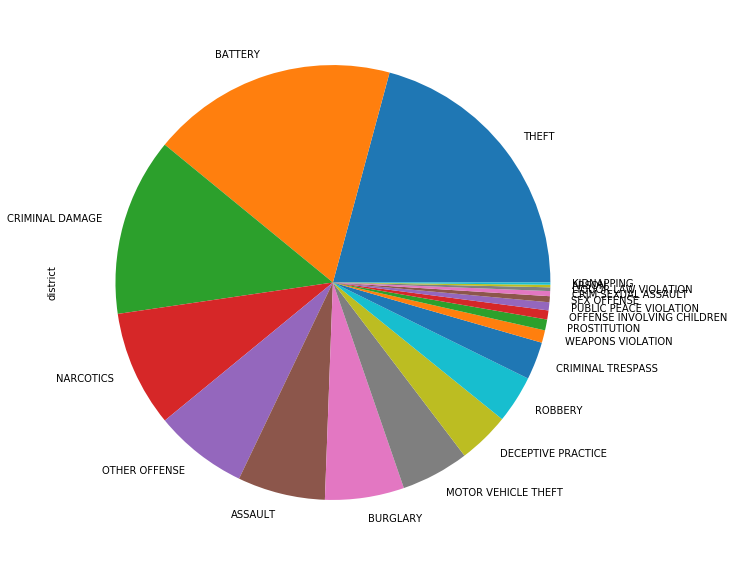

In [59]:
plot = crimeTypeSort.plot.pie(figsize=(10, 10))

**Top 10 most frequently reported crimes, battery and theft obviously dominate.**

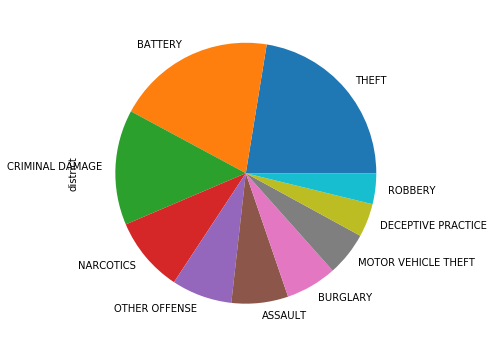

In [60]:
top10 = crime_data.groupby("primary_type")["district"].count().nlargest(10)

plot = top10.plot.pie(figsize=(6, 6))

**List of crimes by year**

In [61]:
crimeTypeYear = crime_data.groupby("year")["primary_type"].count()
print(crimeTypeYear)

year
2001    119663
2002     41252
2003     11117
2004     10629
2005     10277
2006     10058
2007      9810
2008      9892
2009      8982
2010      8263
2011      7962
2012      7795
2013      6823
2014      6185
2015      5919
2016      6031
2017      6055
2018      5928
2019      5679
2020      1680
Name: primary_type, dtype: int64


**Get a closer look at date and primary_type from the data**

In [62]:
crime_data[['date', 'primary_type']]

,date,primary_type
0,2016-03-13 12:00:00+00:00,OFFENSE INVOLVING CHILDREN
1,2008-05-13 20:35:00+00:00,NARCOTICS
2,2019-12-08 10:30:00+00:00,DECEPTIVE PRACTICE
3,2008-10-24 19:55:00+00:00,NARCOTICS
4,2018-08-01 00:01:00+00:00,OFFENSE INVOLVING CHILDREN
...,...,...
299995,2002-03-20 00:30:00+00:00,OTHER OFFENSE
299996,2002-01-08 15:36:10+00:00,OTHER OFFENSE
299997,2001-03-24 06:31:50+00:00,OTHER OFFENSE
299998,2001-09-08 17:15:00+00:00,OTHER OFFENSE


**Search for Criminal Damage**

In [63]:
cd = crime_data

**Convert the timestamp so the year can be graphed**

In [64]:
cd['date'] = pd.to_datetime(cd['date'])
cd['year'] = cd['date'].dt.year


**Create a graph of all of reported crimes
Battery and theft are at the top of the list.**

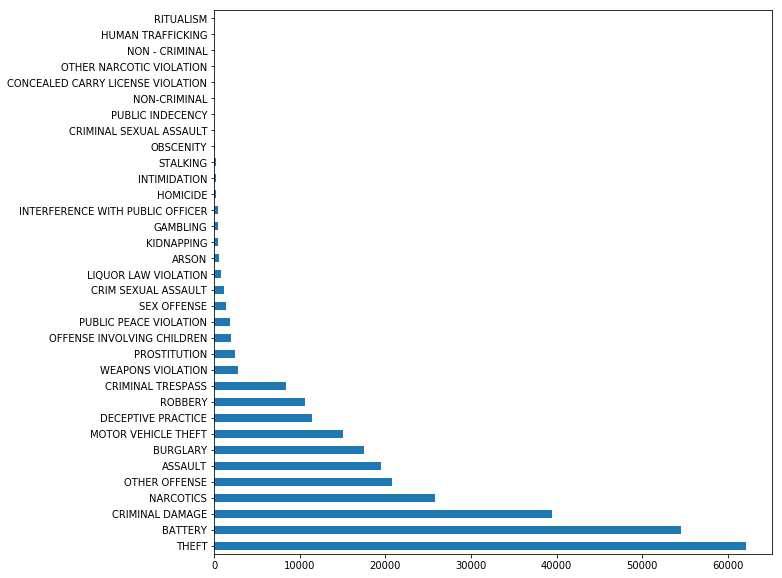

In [65]:
cd['primary_type'].value_counts()
cd['primary_type'].value_counts().plot.barh(x='crimes', y='count', figsize=(10, 10))

**Now focus on the Top 10 crimes total over entire date range**

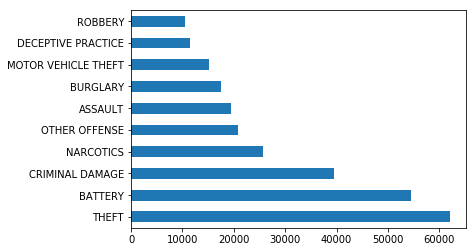

In [66]:
total = cd['primary_type'].value_counts()[:20]
cd['primary_type'].value_counts()[:10].plot(kind='barh')


**Now looking only at 2001 (the first year)** returning the number of entries

In [67]:
first = cd[cd.year == 2001]
print(first.year.count())
last = cd[cd.year ==2018]
#np.sum('year'==2001)
#np.sum('year'== 2017)

119663


**Now let's look at the top 20 crimes committed in 2001.**

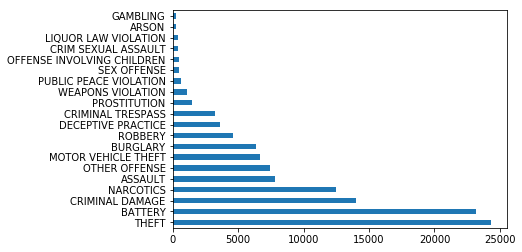

In [68]:
firstGraph = first['primary_type'].value_counts()[:20]
first['primary_type'].value_counts()[:20].plot(kind="barh")
lastGraph = last['primary_type'].value_counts()[:20]


**Comparing 2018 to 2001, this is a huge difference, there might be less data so let's check 2017**

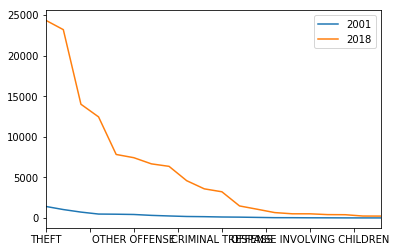

In [69]:
ax = lastGraph.plot()
firstGraph.plot(ax=ax)
ax.legend(["2001", "2018"]);


2017 vs 2001

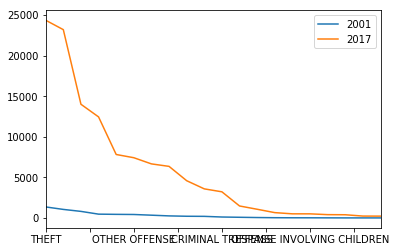

In [70]:
yr2017 = cd[cd.year == 2017]
yr2017Graph = yr2017['primary_type'].value_counts()[:20]
ax = yr2017Graph.plot()
firstGraph.plot(ax=ax)
ax.legend(["2001", "2017"]);

**Just checking the difference between 2017 and 2018, looks like they have a very similar rate, There are more thefts in 2018, and less criminal damage in 2018, but otherwise, the numbers between 2017 and 2018 look pretty similar.**

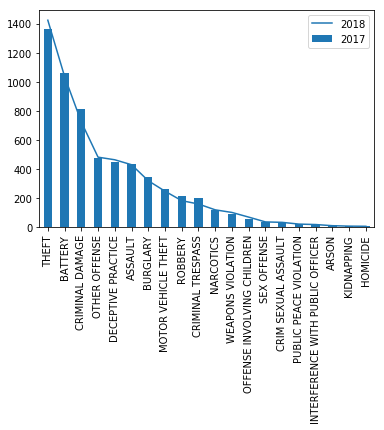

In [71]:
ax = lastGraph.plot()
yr2017Graph.plot(ax=ax, kind="bar")
ax.legend(["2018", "2017"])

**Create 2018 dataset**

In [72]:
twentyEighteen = cd[cd.year == 2018]
#np.sum('year'==2018)
print(twentyEighteen.year.count())

5928


**2001 top 10 crimes**


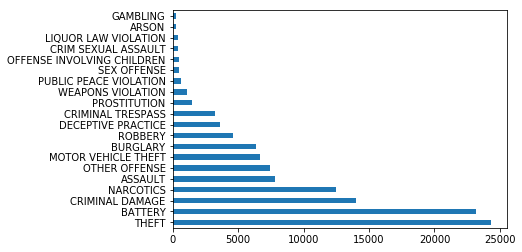

In [73]:
first['primary_type'].value_counts()[:20].plot(kind='barh')

**2018 top 10 crimes**

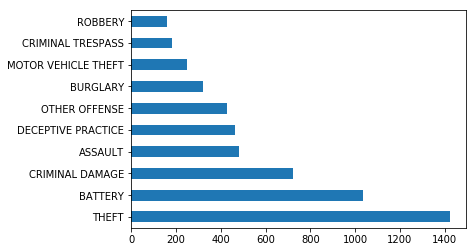

In [74]:
twentyEighteen['primary_type'].value_counts()[:10].plot(kind='barh')
test=twentyEighteen['primary_type'].value_counts()[:10]

**Graph all the different crimes from 2001 to 2019**
Notice how the number seem to decrease dramatically for all of the crimes**

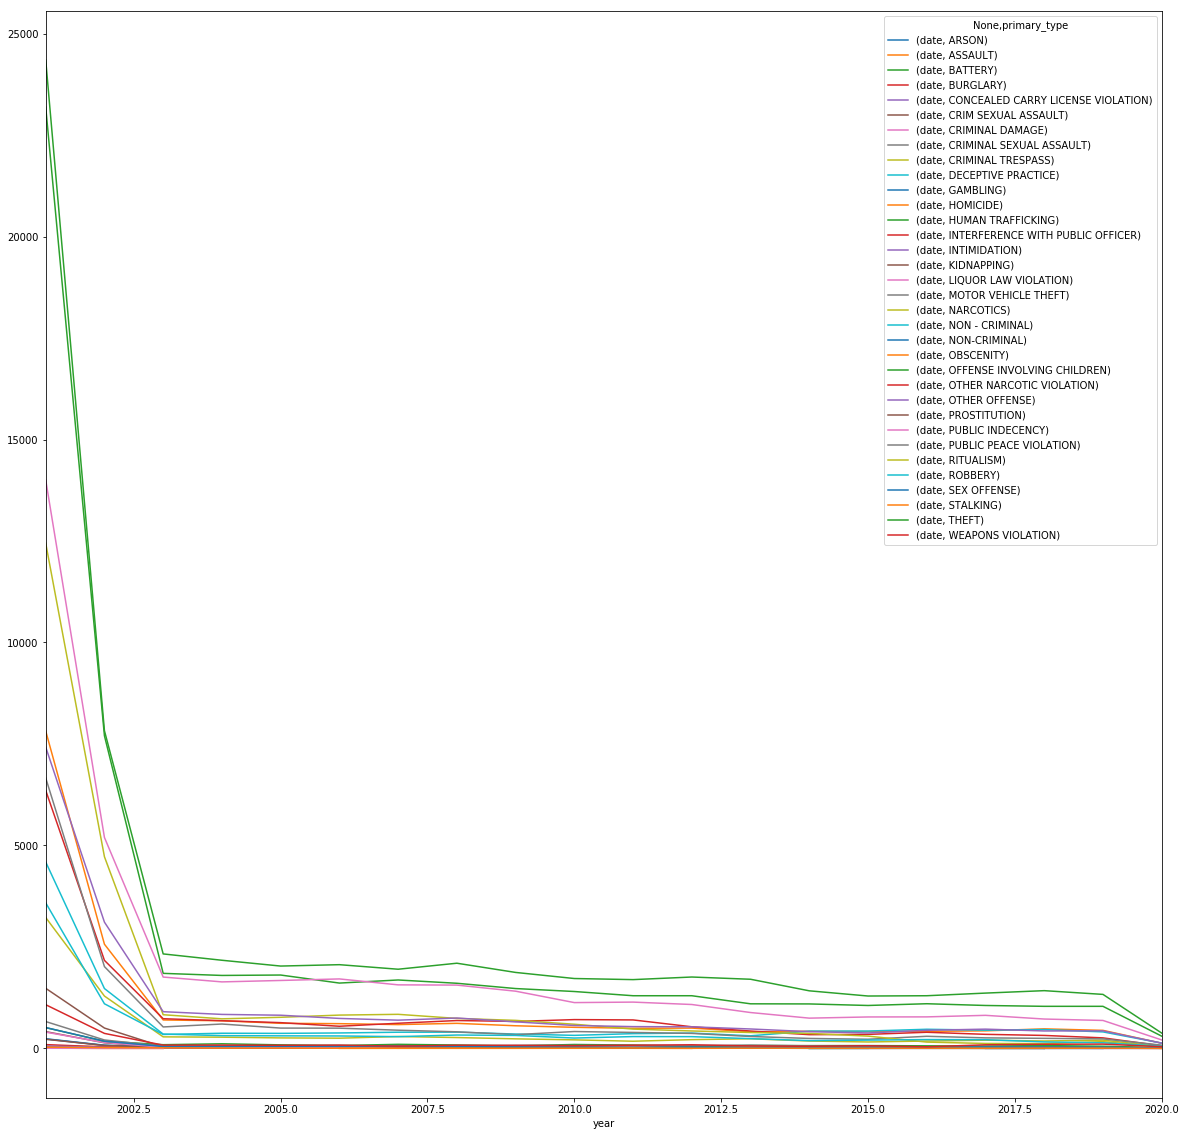

In [75]:
fig, ax = plt.subplots(figsize=(20,20))
#ax.set_xticklabels([])
ax.legend_ = None
#draw()
trial = cd.drop(['location_description', 'ward', 'domestic','community_area', 'district', 'longitude', 'arrest', 'latitude', 'location'], axis=1)
trial.groupby(['year','primary_type']).count().unstack().plot(ax=ax)
plt.show()

**Theft over time, while it is the most reported, it does show a sharp decline between 2001 and 2003 see the graph below which shows theft offenses over the years**

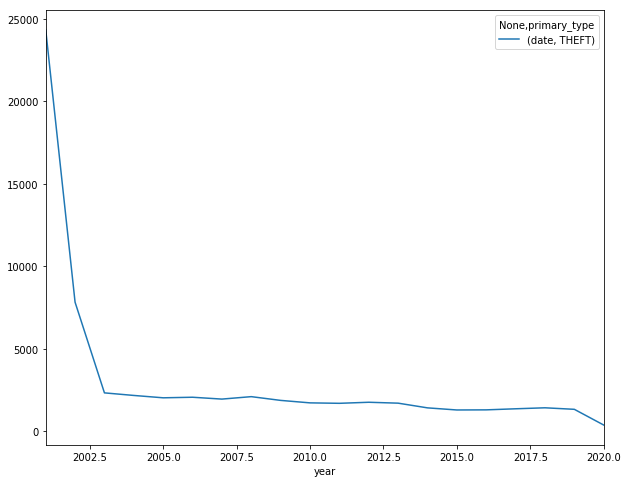

In [76]:
fig, ax = plt.subplots(figsize=(10,8))
trial = cd.drop(['location_description', 'ward', 'domestic','community_area', 'district', 'longitude', 'arrest', 'latitude', 'location'], axis=1)
trial = trial.groupby(['primary_type'])
theft = trial.get_group('THEFT') 
theft.groupby(['year', 'primary_type']).count().unstack().plot(ax=ax)
plt.show()

**Battery over time has a similar trend to theft, there is a huge drop between 2001 and 2003**

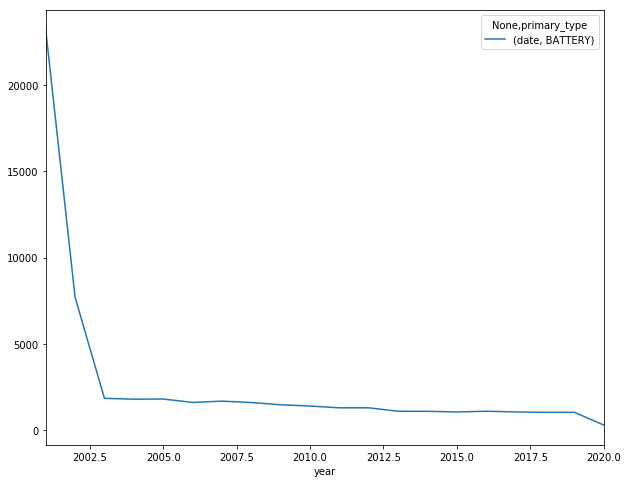

In [77]:
fig, ax = plt.subplots(figsize=(10,8))
trial = cd.drop(['location_description', 'ward', 'domestic','community_area', 'district', 'longitude', 'arrest', 'latitude', 'location'], axis=1)
trial = trial.groupby(['primary_type'])
theft = trial.get_group('BATTERY') 
theft.groupby(['year', 'primary_type']).count().unstack().plot(ax=ax)
plt.show()

**Criminal Damage over time which also shows a large drop between 2001 and 2003**

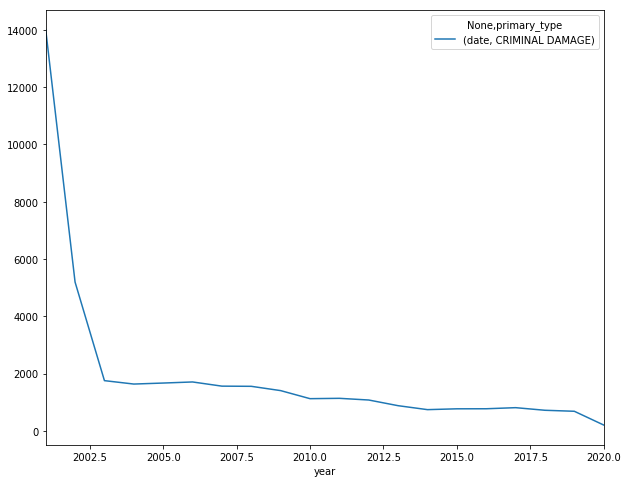

In [78]:
fig, ax = plt.subplots(figsize=(10,8))
trial = cd.drop(['location_description', 'ward', 'domestic','community_area', 'district', 'longitude', 'arrest', 'latitude', 'location'], axis=1)
trial = trial.groupby(['primary_type'])
theft = trial.get_group('CRIMINAL DAMAGE') 
theft.groupby(['year', 'primary_type']).count().unstack().plot(ax=ax)
plt.show()

**Describe the data**

In [79]:
cd.describe()

,district,ward,community_area,year,latitude,longitude
count,299999.000000,147421.000000,147134.000000,300000.000000,296334.000000,296334.000000
mean,11.760029,23.370680,36.293603,2005.312910,41.841241,-87.668740
std,7.501578,16.728937,23.946660,5.505444,0.113583,0.072935
min,1.000000,2.000000,0.000000,2001.000000,36.619446,-91.686566
25%,5.000000,9.000000,11.000000,2001.000000,41.750252,-87.717304
50%,9.000000,14.000000,45.000000,2002.000000,41.827777,-87.667659
75%,17.000000,41.000000,55.000000,2009.000000,41.932280,-87.620483
max,31.000000,50.000000,74.000000,2020.000000,42.022671,-87.524529


**Create a graph of longitude and latitude
Also look at a histogram of all the crimes per district, the most crimes are reported in districts 4 to 10**


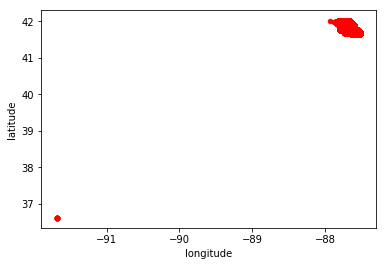

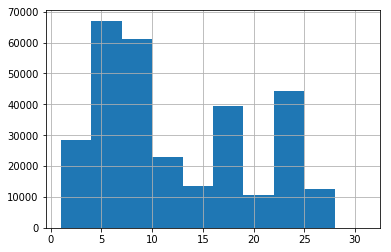

In [80]:
cd.plot(kind='scatter',x='longitude',y='latitude',color='red')
plt.show()
cd['district'].hist()
plt.show()

Graph of latitutde and longitude based upon offense

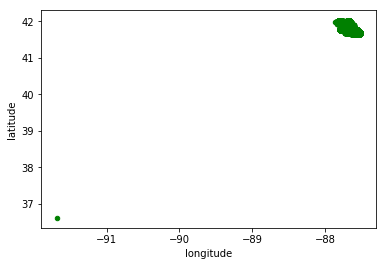

In [81]:
crimeData = crime_data[crime_data.primary_type == 'CRIMINAL DAMAGE']
crimeData.plot(kind='scatter',x='longitude',y='latitude',color='green')
plt.show()


Histogram of crime per district

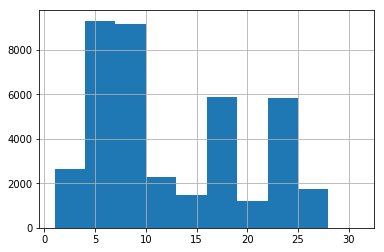

In [82]:
crimeData["district"].hist()
plt.show()

**Below is a histogram of districts with a count of their weapons offenses. Note districts 4 to 10 have the highest count, but 16 to 19 are not far behind.**

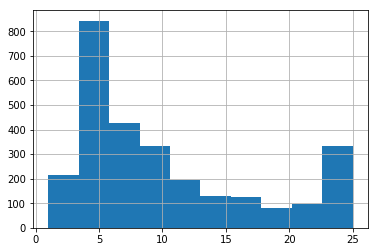

In [83]:
weaponData = crime_data[crime_data.primary_type == 'WEAPONS VIOLATION']
weaponData["district"].hist()
plt.show()


**Also I created a histogram of districts for the count of battery offenses.**

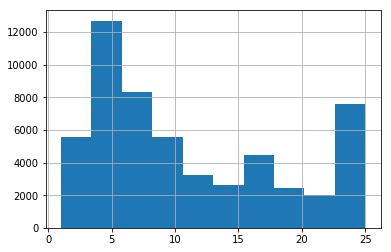

In [84]:
batteryData = crime_data[crime_data.primary_type == 'BATTERY']
batteryData["district"].hist()
plt.show()

**Look at the crime reported in the districts in the first year**
The highest counts are in districts 6-8

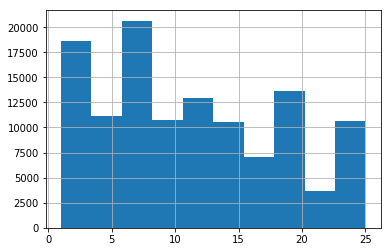

In [85]:
x =first["district"].hist()
plt.show()

**The graph shows the count for crimes committed per district in 2018.  Districts 3 - 6 were the highest.**

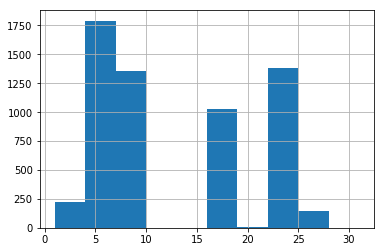

In [86]:
y = twentyEighteen['district'].hist()
plt.show()

**I tried correlation using matplotlib**

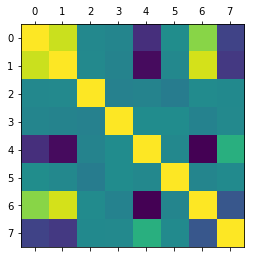

In [87]:
plt.matshow(cd.corr())
plt.show()

**I used Seaborn for correlation. So negative correlations are distrct to latitutde/longitude, ward and community area and longitude also have negative correlations. Positive correlations are ward to district, ward to latitude.**

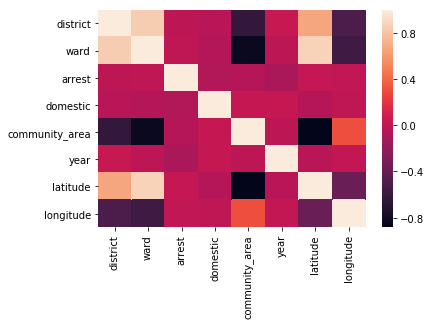

In [88]:
corr = cd.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Conclusion
The crime rate in Chicago has fallen every year, starting from 2001, except for 2008, 2016, 2017 which all saw relatively minor increases in offenses.
The most common crimes are theft and battery.
Then I looked at the crime rate by district. Certain districts (3-6, 7-10, as well as 16-19) tend to have more crime.
I also looked at the correlation between the variables. District and ward, as well as district and latitude are all higher correlated. While community_area and district, ward and community area are negatively correlated, as are district and longitude.  